In [1]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/resultBaseLine/new_advBIM_ratio'
idx_code = 1

files = [f for f in os.listdir(resDir) if f.endswith('balancesample.csv')]
files = [f for f in files if '-0.1-0.0005' in f]
querys = list(set([f.split('_')[5] for f in files]))
ratio = [float(q.split('-')[idx_code]) for q in querys]
querys = [x for _, x in sorted(zip(ratio, querys))]
print(querys)

['AdversarialBIM-0.75-0.1-0.0005', 'AdversarialBIM-0.8-0.1-0.0005', 'AdversarialBIM-0.85-0.1-0.0005', 'AdversarialBIM-0.9-0.1-0.0005', 'AdversarialBIM-0.95-0.1-0.0005']


A549
           acc        f1
0.75  0.741724  0.590545
0.80  0.746725  0.590116
0.85  0.743468  0.590922
0.90  0.741701  0.586897
0.95  0.748181  0.592161
MCF7
           acc        f1
0.75  0.684809  0.559415
0.80  0.697393  0.566354
0.85  0.710171  0.568401
0.90  0.710422  0.567716
0.95  0.708218  0.565316
PC3
           acc        f1
0.75  0.721040  0.564585
0.80  0.711399  0.561212
0.85  0.702744  0.558458
0.90  0.724629  0.567109
0.95  0.725383  0.569654


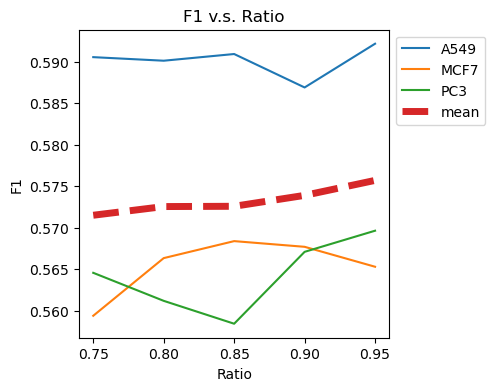

In [7]:
# y = [0]*7
y = [0]*5

celllist = ['A549', 'MCF7', 'PC3']#[1:-1]
fig, ax = plt.subplots(1,1, figsize=(4,4))
for c in celllist:
    print(c)
    filesc = [f for f in files if c in f]
    # [print(fq) for fq in filesc]
    f1_all, precision_all, recall_all = [],[],[]
    df_c = pd.DataFrame()
    for q in querys:
        fqc = [f for f in filesc if q in f][0]
        # print(q)
        df = pd.read_csv(f'{resDir}/{fqc}', index_col=0)
        # print(df)
        # print(df.mean(1))
        df_c[float(q.split('-')[idx_code])] = df.mean(1)
        # print(df.T.to_numpy().mean(0))
        # print(df.T.to_numpy().std(0))
    # print(df_c.index)
    print(df_c.loc[['acc', 'f1']].T)
    # df_c.T.to_csv(f'{resDir}/all_summary_{c}.csv')
    y = [df_c.T.f1.to_list()[i] + y[i] for i in range(len(y))]
    x = df_c.T.index.to_list()
    ax.plot(df_c.T.index.to_list(), df_c.T.f1.to_list(), label=c)
ax.plot(x, [e/3 for e in y], '--', label='mean', linewidth=5.0)
plt.legend(bbox_to_anchor=(1, 1))


plt.title('F1 v.s. Ratio')
plt.xlabel('Ratio')
plt.ylabel('F1')
# fig.tight_layout()
plt.show()

In [25]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/resultBaseLine/new_advBIM_ratio'
idx_code = 1

files = [f for f in os.listdir(resDir) if f.endswith('balancesample.pkl')]
files = [f for f in files if '-0.1-0.0005' in f]
querys = list(set([f.split('_')[5] for f in files]))
ratio = [float(q.split('-')[idx_code]) for q in querys]
querys = [x for _, x in sorted(zip(ratio, querys))]
print(querys)

['AdversarialBIM-0.75-0.1-0.0005', 'AdversarialBIM-0.8-0.1-0.0005', 'AdversarialBIM-0.85-0.1-0.0005', 'AdversarialBIM-0.9-0.1-0.0005', 'AdversarialBIM-0.95-0.1-0.0005']


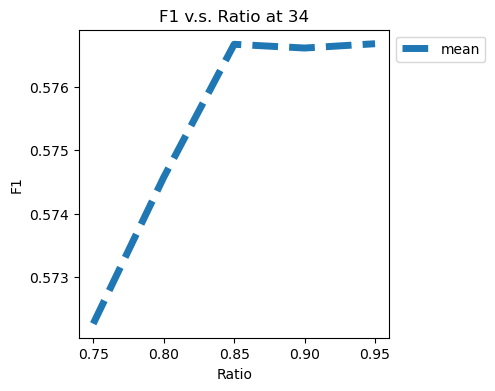

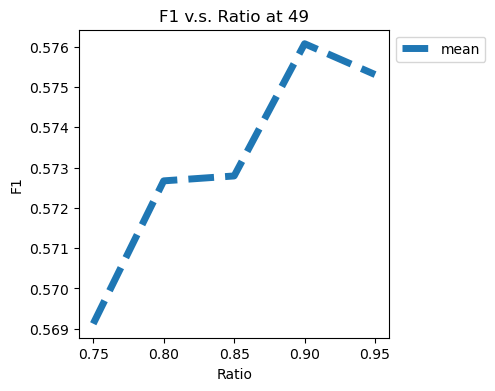

In [43]:
def readfrompkl(file, epoch=30, repeat=3):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    epoch = epoch
    f1 = 0
    for i in range(repeat):
        history = data[i][2]
        f1 += history[epoch]['test f1']
    f1 = f1/3
    return f1


def atepoch(epoch):
    celllist = ['A549', 'MCF7', 'PC3']#[1:-1]
    y = [0]*5

    fig, ax = plt.subplots(1,1, figsize=(4,4))
    for c in celllist:
        # print(c)
        filesc = [f for f in files if c in f]
        # print(filesc)
        x = []
        yc = []
        for q in querys:
            # print(float(q.split('-')[idx_code]))
            fqc = [f for f in filesc if q in f][0]
            yc.append(readfrompkl(f'{resDir}/{fqc}', epoch=epoch, repeat=3))
            x.append(float(q.split('-')[idx_code]))
        # ax.plot(x, yc, label=c)
        y = [yc[i] + y[i] for i in range(len(y))]
    ax.plot(x, [e/3 for e in y], '--', label='mean', linewidth=5.0)
    plt.legend(bbox_to_anchor=(1, 1))


    plt.title(f'F1 v.s. Ratio at {str(epoch)}')
    plt.xlabel('Ratio')
    plt.ylabel('F1')
    # fig.tight_layout()
    plt.show()
    
    
# for i in range(50):
#     atepoch(i)
    
atepoch(34)
atepoch(49)